<a href="https://colab.research.google.com/github/othinAbbey/Project-4/blob/main/Onyango_Abbey_Project_4_Part_1_(Core)final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Setting options
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/Intermediate Machine Learning/Project 4 Part 1/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Cleaning

In [76]:
# Create a copy of the original DataFrame
df_copy = df.copy()

## Check for Missing values

In [77]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Check for data types

In [78]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Inspect individual colums for unique values

In [79]:
df['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

In [80]:

# Since the age column has many unique vales, this may cuase sparse data, lets deal with it
# Define the number of bins
num_bins = 4
# Create the bins
df_copy['age_Binned'] = pd.cut(df_copy['age'], bins=num_bins)
# the output is now categorical and lets label eoncode it
label_encoder = LabelEncoder()
df_copy['age_Binned_Encoded'] = label_encoder.fit_transform(df_copy['age_Binned'])

# Dropping the oridinal column
# Drop the original age column
df_copy.drop('age', axis=1, inplace=True)
df_copy.drop('age_Binned', axis=1, inplace=True)

In [81]:
df_copy.dtypes

workclass             object
fnlwgt                 int64
education             object
educational-num        int64
marital-status        object
occupation            object
relationship          object
race                  object
gender                object
capital-gain           int64
capital-loss           int64
hours-per-week         int64
native-country        object
income                object
age_Binned_Encoded     int64
dtype: object

Dealing with the work calss column

In [82]:
df_copy['workclass'].isnull().sum()

# Encording the Workclass columns
# Replace "?" with NaN
# df_copy.replace('?', pd.NA, inplace=True)

# Apply Label Encoding
label_encoder = LabelEncoder()
df_copy['workclass_encoded'] = label_encoder.fit_transform(df_copy['workclass'])
df_copy.drop('workclass', axis=1, inplace=True)

In [83]:
df_copy['workclass_encoded'].unique()

array([4, 2, 0, 6, 1, 7, 5, 8, 3])

Dealing with the fnlwgt column

In [84]:
df_copy['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [85]:
# Encoding the Education column
# Apply Label Encoding
label_encoder = LabelEncoder()
df_copy['education_encoded'] = label_encoder.fit_transform(df_copy['education'])
df_copy.drop('education',axis=1, inplace=True)

In [86]:
df_copy['education_encoded'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12, 10,  4,  8,  6,  2,  3, 13])

In [87]:
df_copy['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [88]:
df_copy['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [89]:
df_copy['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [90]:
df_copy['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [91]:
df_copy['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [92]:
df_copy['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [93]:
df_copy['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [94]:
# Apply One-Hot Encoding to categorical columns
df_copy = pd.get_dummies(df_copy, columns=['marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [95]:
df_copy['income'] = label_encoder.fit_transform(df_copy['income'])

In [96]:
df_copy['income'].unique()

array([0, 1])

# Data Exploration and Visulisation

## Missing Values

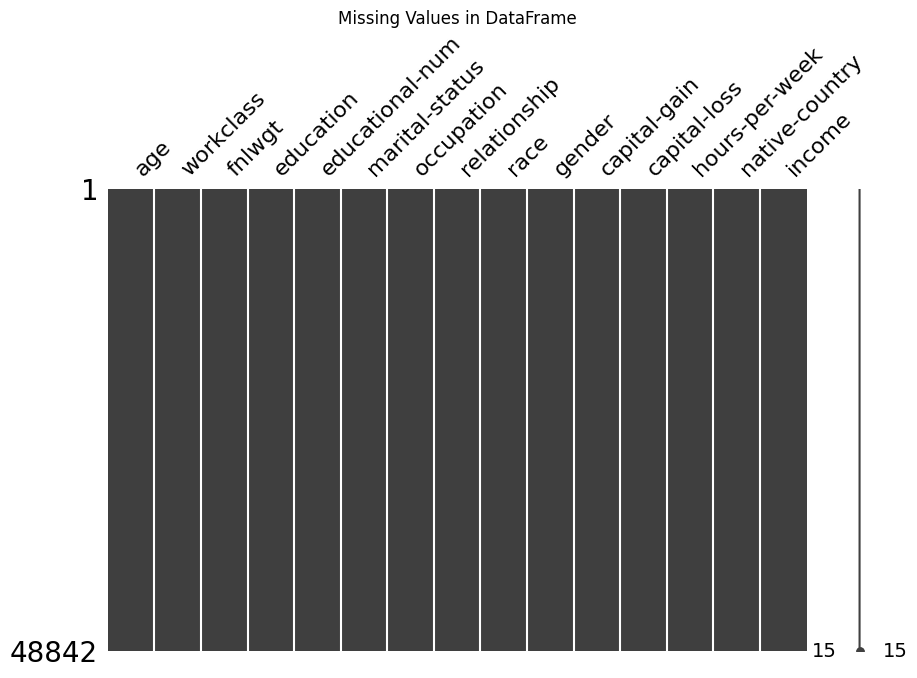

In [97]:
msno.matrix(df, figsize=(10, 6))
plt.title('Missing Values in DataFrame')
plt.show()

## Bar plot of age distribution

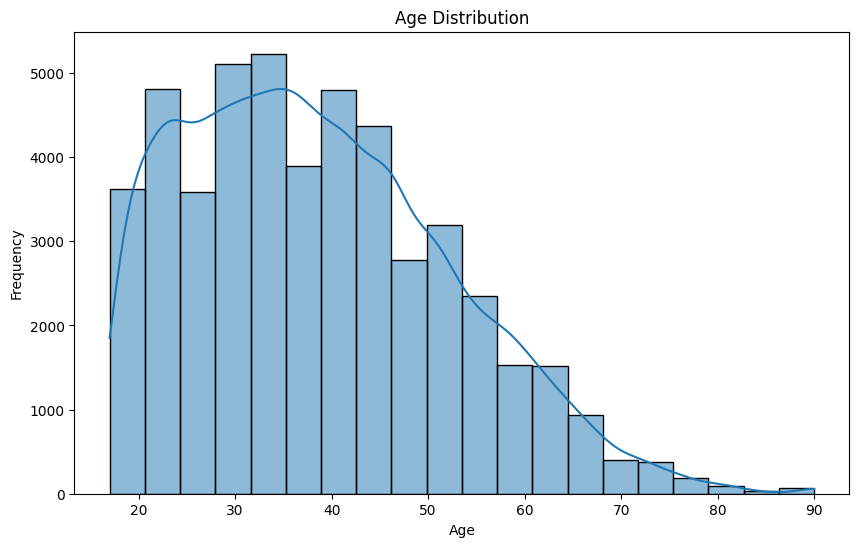

In [98]:
# Bar plot of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Bar plot of education level

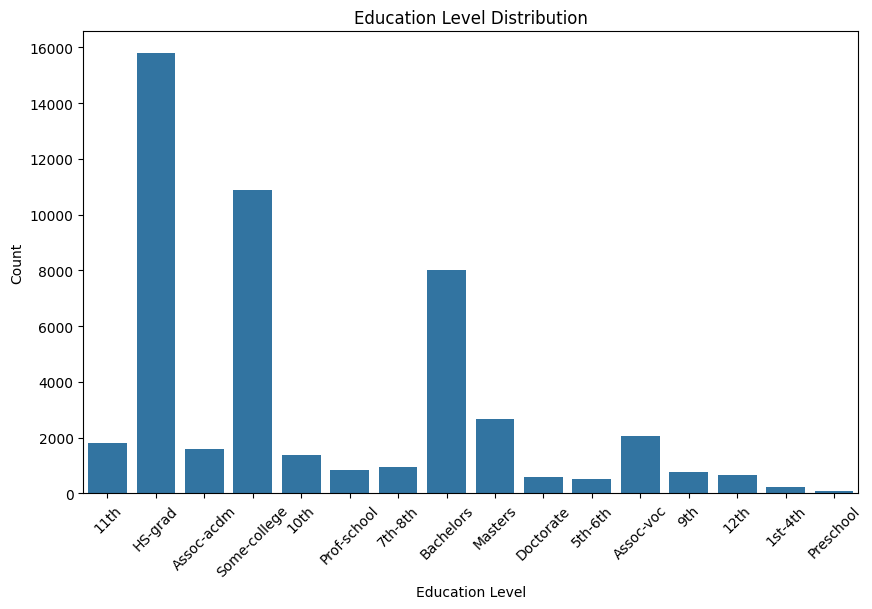

In [99]:
# Bar plot of education level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Box plot of capital gain and capital loss

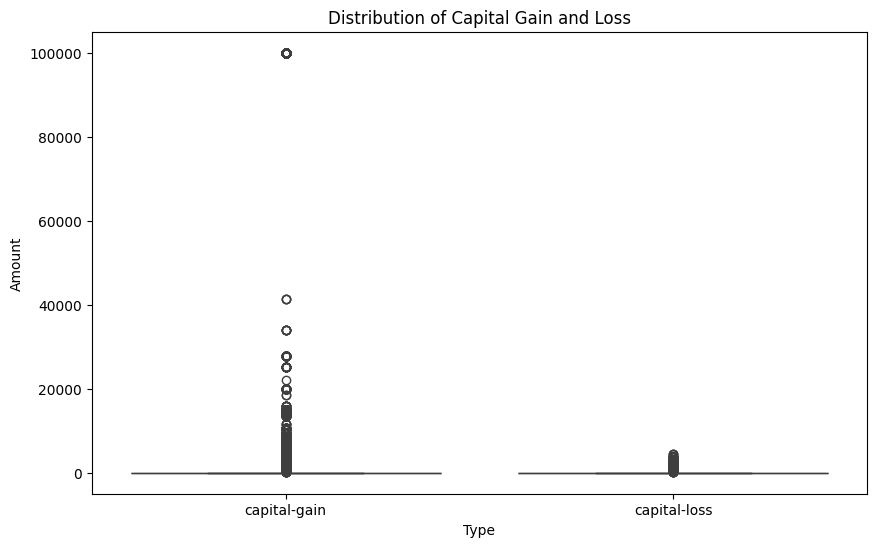

In [100]:
# Box plot of capital gain and capital loss
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['capital-gain', 'capital-loss']])
plt.title('Distribution of Capital Gain and Loss')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.show()

# Splitting the data

In [101]:
# Separate features (X) and target (y)
X = df_copy.drop('income', axis=1)
y = df_copy['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Imputing the missing values in the trainin set

In [102]:
# Impute missing values in training set
imputer = SimpleImputer(strategy='most_frequent')  # You can choose a suitable imputation strategy
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_scaled), columns=X_train.columns)

In [103]:
# Impute missing values in testing set (using the same imputer)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_scaled), columns=X_test.columns)

In [104]:
# Check if any missing values remain
print("Missing values in X_train_imputed:", X_train_imputed.isnull().sum().sum())
print("Missing values in X_test_imputed:", X_test_imputed.isnull().sum().sum())

Missing values in X_train_imputed: 0
Missing values in X_test_imputed: 0


# Fit and Evaluate the model

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

def classification_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):
    # Get metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    if verbose:
        # Print Result with Label and Header
        header = "-" * 60
        print(header, f"Classification Metrics: {label}", header, sep='\n')
        print(f"- Accuracy = {accuracy:,.3f}")
        print(f"- Precision = {precision:,.3f}")
        print(f"- Recall = {recall:,.3f}")
        print(f"- F1-score = {f1:,.3f}")
        print("Confusion Matrix:")
        print(cm)
    if output_dict:
        metrics = {'Label': label, 'Accuracy': accuracy,
                   'Precision': precision, 'Recall': recall, 'F1-score': f1, 'Confusion Matrix': cm}
        return metrics

def evaluate_classification(clf, X_train, y_train, X_test, y_test, verbose=True, output_frame=False):
    # Get predictions for training data
    y_train_pred = clf.predict(X_train)

    # Call the helper function to obtain classification metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, verbose=verbose,
                                            output_dict=output_frame,
                                            label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = clf.predict(X_test)
    # Call the helper function to obtain classification metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, verbose=verbose,
                                           output_dict=output_frame,
                                           label='Test Data')

    # Store results in a dataframe if output_frame is True
    if output_frame:
        results_df = pd.DataFrame([results_train, results_test])
        # Set the label as the index
        results_df = results_df.set_index('Label')
        # Set index.name to none to get a cleaner looking result
        results_df.index.name = None
        # Return the dataframe
        return results_df.round(3)


Evaluate the model

In [106]:
# Initialize and train your classification model (for example, RandomForestClassifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

# Evaluate the classification model
results = evaluate_classification(clf, X_train, y_train, X_test, y_test, verbose=True, output_frame=True)
print(results)

------------------------------------------------------------
Classification Metrics: Training Data
------------------------------------------------------------
- Accuracy = 0.648
- Precision = 0.400
- Recall = 0.931
- F1-score = 0.560
Confusion Matrix:
[[16573 13103]
 [  647  8750]]

------------------------------------------------------------
Classification Metrics: Test Data
------------------------------------------------------------
- Accuracy = 0.651
- Precision = 0.396
- Recall = 0.936
- F1-score = 0.557
Confusion Matrix:
[[4214 3265]
 [ 147 2143]]
               Accuracy  Precision  Recall  F1-score  \
Training Data     0.648      0.400   0.931     0.560   
Test Data         0.651      0.396   0.936     0.557   

                            Confusion Matrix  
Training Data  [[16573, 13103], [647, 8750]]  
Test Data        [[4214, 3265], [147, 2143]]  


# Permutation importance(Extract and visualize the top 10 features )

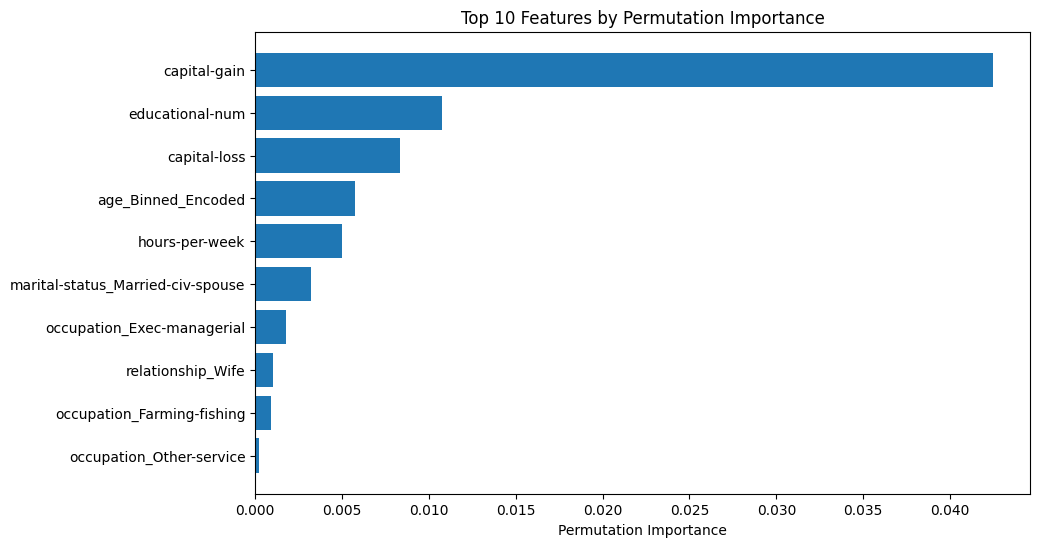

In [107]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Fit your model (replace RandomForestClassifier with your trained model)
clf.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature importances and names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort feature importances and names
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features by Permutation Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


# Explanatory Visualizations for the most important features.

## Bar plot for average capital gain and education num by income

<ipython-input-108-a1db3832d68b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='capital-gain', data=avg_data, palette='Blues_d')
<ipython-input-108-a1db3832d68b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='educational-num', data=avg_data, palette='Greens_d')


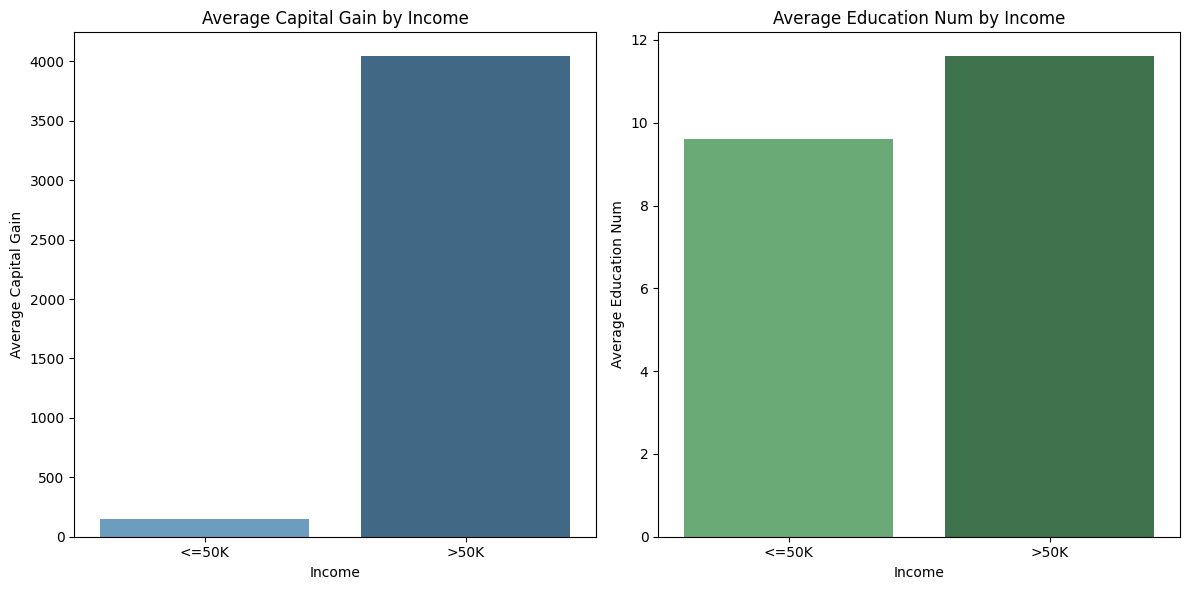

In [108]:
# Bar plot for average capital gain and education num by income
avg_data = df.groupby('income').agg({'capital-gain': 'mean', 'educational-num': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='income', y='capital-gain', data=avg_data, palette='Blues_d')
plt.title('Average Capital Gain by Income')
plt.xlabel('Income')
plt.ylabel('Average Capital Gain')

plt.subplot(1, 2, 2)
sns.barplot(x='income', y='educational-num', data=avg_data, palette='Greens_d')
plt.title('Average Education Num by Income')
plt.xlabel('Income')
plt.ylabel('Average Education Num')

plt.tight_layout()
plt.show()


**Insight:**
  - The bar plots show the average capital gain (left) and education num (right) for different income groups.
  - We observe that higher income groups tend to have both higher average capital gains and higher average education levels.
  - This suggests a positive association between income, education, and capital gain, indicating that individuals with higher education levels may have access to better income opportunities and investment options, leading to higher capital gains.

<ipython-input-109-e95a45bb467c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='educational-num', y='income', data=df, palette='Set2')


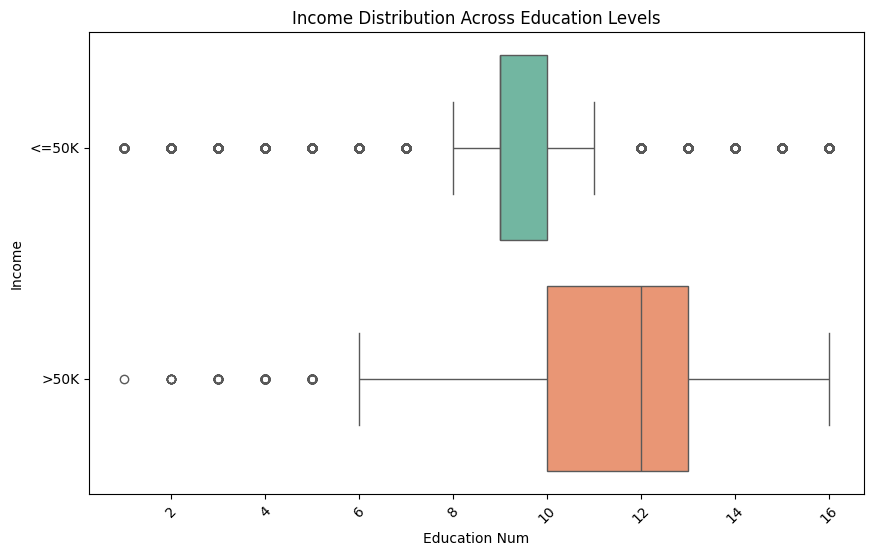

In [109]:
# Box plot for education num vs. income
plt.figure(figsize=(10, 6))
sns.boxplot(x='educational-num', y='income', data=df, palette='Set2')
plt.title('Income Distribution Across Education Levels')
plt.xlabel('Education Num')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


**Insight**:
- In this box plot, each box represents the distribution of income for different levels of education. The vertical axis represents the income levels, while the horizontal axis represents the education level, indicated by education num. We observe that higher education levels tend to be associated with higher incomes, as evidenced by the increasing median income across higher education num categories.
- This suggests that there is a positive correlation between education level and income, highlighting the importance of education in determining individuals' earning potential.

# Project 4 Part 2

In [110]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).

In [118]:
# Step 1: Apply PCA to get 3 principal components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_imputed)
# X_test_scaled = scaler.transform(X_test_imputed)

# Fit PCA on training data
pca = PCA(n_components=3)
pca.fit(X_train_imputed)

# Transform training and testing data
X_train_pca = pca.transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

# Concatenate principal components with original features
X_train_combined = np.concatenate((X_train, X_train_pca), axis=1)
X_test_combined = np.concatenate((X_test, X_test_pca), axis=1)


Apply clustering

In [120]:
from sklearn.cluster import KMeans
import pandas as pd
# Define the number of clusters (you may need to adjust this)
num_clusters = 3

# Fit KMeans only on the training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_combined)


# Get cluster labels for training and test data
train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(X_test_combined)

# Convert cluster labels to one-hot encoding
train_cluster_labels_onehot = pd.get_dummies(train_cluster_labels, prefix='cluster')
test_cluster_labels_onehot = pd.get_dummies(test_cluster_labels, prefix='cluster')

# Concatenate cluster labels with original features
X_train_clustered = pd.concat([X_train, train_cluster_labels_onehot], axis=1)
X_test_clustered = pd.concat([X_test, test_cluster_labels_onehot], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [125]:
X_train_clustered.isnull().sum().sum()

686488

In [129]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train_clustered = imputer.fit_transform(X_train_clustered)
X_test_clustered = imputer.fit_transform(X_train_clustered)

In [130]:
X_train_clustered.isnull().sum().sum()

0

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [137]:
# Step 2: Fit and evaluate a model using the new features

# Train Random Forest model
rf_model_with_pca = RandomForestClassifier(random_state=42)
rf_model_with_pca.fit(X_train_combined, y_train)

# Make predictions
y_pred_with_pca = rf_model_with_pca.predict(X_test_combined)

# Evaluate model performance
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)


In [138]:
# Step 3: Apply feature selection to the new features
from sklearn.feature_selection import SelectFromModel

# Create feature selector using Random Forest
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42))

# Fit feature selector on combined data
feature_selector.fit(X_train_combined, y_train)

# Transform data
X_train_selected = feature_selector.transform(X_train_combined)
X_test_selected = feature_selector.transform(X_test_combined)


In [139]:
# Step 4: Fit and evaluate a final model using the selected features
# Train Random Forest model with selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate model performance
accuracy_selected_features = accuracy_score(y_test, y_pred_selected)


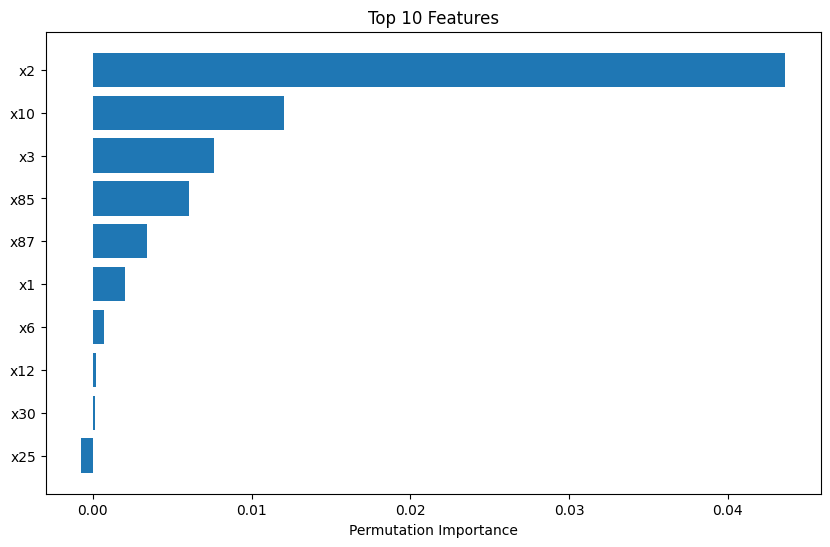

In [140]:
# Step 5: Extract and visualize the top 10 features using permutation importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
result = permutation_importance(rf_model_selected, X_test_selected, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(10), X_test_selected.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features')
plt.show()
